<a href="https://colab.research.google.com/github/wcliao1962/2025_DL/blob/master/Keras_Mnist_MLP_h256.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 資料預處理

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.18.0'

In [ ]:
# from keras.utils import np_utils   # tf 1.x
from tensorflow.keras import utils   # tf 2.0
import numpy as np
np.random.seed(10)

In [ ]:
from tensorflow.keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [ ]:
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [ ]:
y_Train_OneHot = utils.to_categorical(y_train_label)
y_Test_OneHot = utils.to_categorical(y_test_label)

# 建立模型

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(units=256,
                input_dim=784,
                kernel_initializer='normal',
                activation='relu'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.add(Dense(units=10,
                kernel_initializer='normal',
                activation='softmax'))

In [ ]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 203,530 (795.04 KB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

None


# 訓練模型

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [ ]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2,
                         epochs=10, batch_size=200,verbose=2)

Epoch 1/10
240/240 - 3s - 12ms/step - accuracy: 0.8833 - loss: 0.4388 - val_accuracy: 0.9362 - val_loss: 0.2292
Epoch 2/10
240/240 - 3s - 11ms/step - accuracy: 0.9464 - loss: 0.1889 - val_accuracy: 0.9587 - val_loss: 0.1528
Epoch 3/10
240/240 - 2s - 7ms/step - accuracy: 0.9625 - loss: 0.1341 - val_accuracy: 0.9647 - val_loss: 0.1265
Epoch 4/10
240/240 - 2s - 7ms/step - accuracy: 0.9708 - loss: 0.1026 - val_accuracy: 0.9676 - val_loss: 0.1095
Epoch 5/10
240/240 - 3s - 11ms/step - accuracy: 0.9776 - loss: 0.0812 - val_accuracy: 0.9712 - val_loss: 0.1012
Epoch 6/10
240/240 - 2s - 10ms/step - accuracy: 0.9814 - loss: 0.0674 - val_accuracy: 0.9743 - val_loss: 0.0877
Epoch 7/10
240/240 - 4s - 15ms/step - accuracy: 0.9852 - loss: 0.0551 - val_accuracy: 0.9733 - val_loss: 0.0874
Epoch 8/10
240/240 - 2s - 8ms/step - accuracy: 0.9876 - loss: 0.0466 - val_accuracy: 0.9745 - val_loss: 0.0830
Epoch 9/10
240/240 - 2s - 7ms/step - accuracy: 0.9895 - loss: 0.0383 - val_accuracy: 0.9756 - val_loss: 0.0

# 以圖形顯示訓練過程

In [ ]:
train_history.history

{'accuracy': [0.8833125233650208,
  0.9463541507720947,
  0.9625416398048401,
  0.9707708358764648,
  0.9775833487510681,
  0.9814375042915344,
  0.9851666688919067,
  0.9876041412353516,
  0.9895416498184204,
  0.9913125038146973],
 'loss': [0.4387845993041992,
  0.18893210589885712,
  0.13405770063400269,
  0.10259614884853363,
  0.08123274892568588,
  0.06738325953483582,
  0.05511772632598877,
  0.04655112326145172,
  0.03834228962659836,
  0.03251456841826439],
 'val_accuracy': [0.9362499713897705,
  0.9586666822433472,
  0.9647499918937683,
  0.9675833582878113,
  0.9711666703224182,
  0.9743333458900452,
  0.9733333587646484,
  0.9745000004768372,
  0.9755833148956299,
  0.9755833148956299],
 'val_loss': [0.22923226654529572,
  0.15282823145389557,
  0.12648823857307434,
  0.10945682972669601,
  0.10116758197546005,
  0.0876840204000473,
  0.0873701199889183,
  0.08302503079175949,
  0.07975278049707413,
  0.08178476244211197]}

In [ ]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

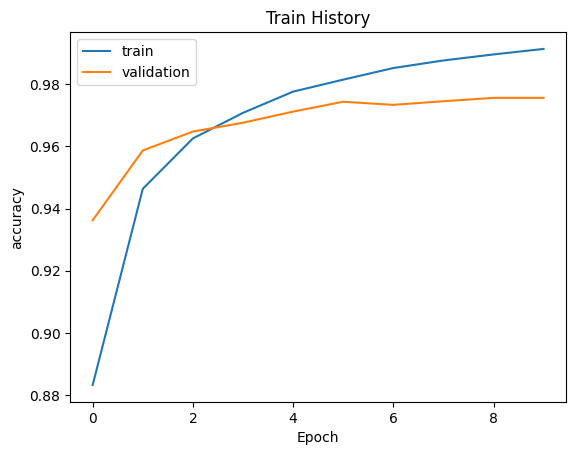

In [ ]:
show_train_history(train_history,'accuracy','val_accuracy')

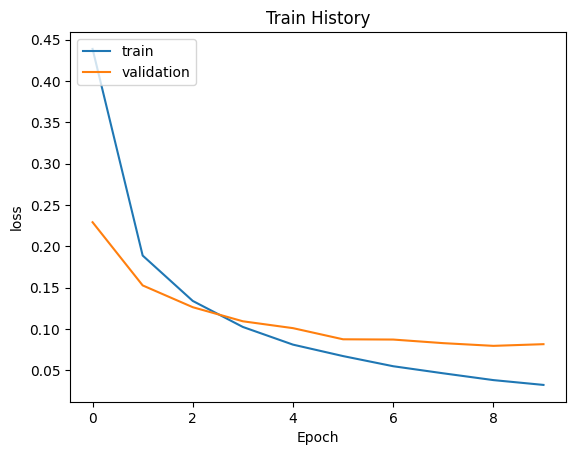

In [ ]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [ ]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9722 - loss: 0.0869

accuracy= 0.9757999777793884


# 進行預測

In [ ]:
prediction=model.predict(x_Test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
prediction

array([[0.        , 0.        , 0.        , ..., 0.99999994, 0.        ,
        0.        ],
       [0.        , 0.        , 0.99999994, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.99999994, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [ ]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(np.argmax(prediction[idx]))

        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

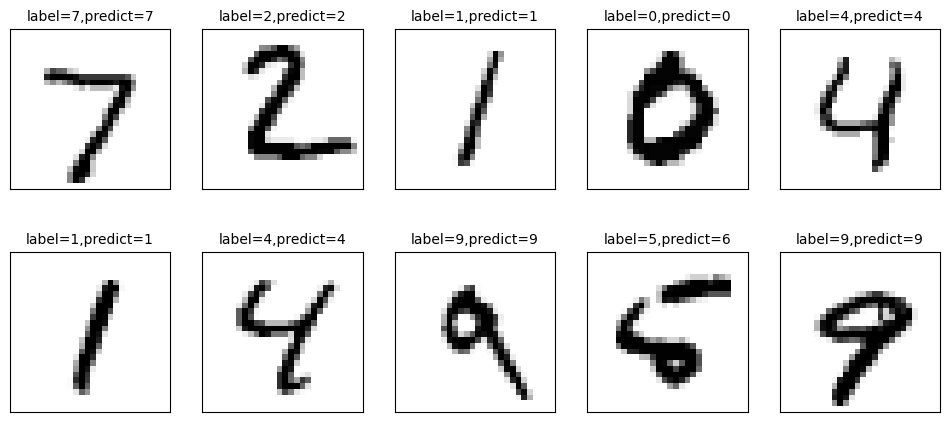

In [ ]:
plot_images_labels_prediction(x_test_image,y_test_label,
                              prediction,idx=0)

# confusion matrix

In [ ]:
import pandas as pd
# pd.crosstab(y_test_label,prediction,rownames=['label'],colnames=['predict'])
predicted_labels = np.argmax(prediction, axis=1)

# Now use predicted_labels in crosstab
pd.crosstab(y_test_label, predicted_labels, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,968,0,1,2,1,1,1,1,3,2
1,0,1127,3,0,0,1,1,0,3,0
2,4,1,1005,4,1,0,2,6,9,0
3,0,0,3,986,0,4,0,5,4,8
4,1,0,1,1,955,0,1,3,2,18
5,3,0,0,8,1,864,5,2,5,4
6,6,3,2,1,8,3,932,0,3,0
7,1,9,9,5,0,0,0,991,2,11
8,3,1,2,8,4,4,1,3,945,3


In [ ]:
# df = pd.DataFrame({'label':y_test_label, 'predict':prediction})

# Now use predicted_labels in crosstab
# pd.crosstab(y_test_label, predicted_labels, rownames=['label'], colnames=['predict'])

# Create the DataFrame with the 1-dimensional predicted_labels instead of the 2-dimensional prediction array
df = pd.DataFrame({'label': y_test_label, 'predict': predicted_labels})
df[:10]

,label,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,6
9,9,9


In [ ]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
1670,5,3
4360,5,3
5937,5,3
5972,5,3
8502,5,3


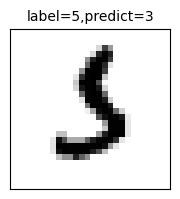

In [ ]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=340,num=1)

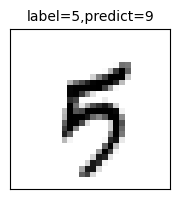

In [ ]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=1289,num=1)